<a href="https://colab.research.google.com/github/minchillo4/clustering-project/blob/main/clustering_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas necessárias

In [2]:
from google.colab import files
import sqlite3
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.metrics

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
drive.mount('/content/drive')


Mounted at /content/drive


Aqui estamos carregando o conjunto de dados 'Mall_customers.csv' usando o pandas e armazenando-o em um DataFrame chamado 'data'.

In [3]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
df = pd.read_csv("Mall_Customers.csv", encoding="utf-8") ## Criando o dataframe inicial
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Limpeza dos Dados

In [5]:
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [6]:
df.isna().any()


CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

Análise Exploratória de Dados

Este trecho de código exibe estatísticas descritivas do DataFrame *df*, como média, desvio padrão, mínimo, máximo e quartis.

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Como podemos ver, a coluna *Gender* é repersenta uma variável categórica. O algorítmo k-means não é diretamentamente aplicavel para variáveis categoricas.Vamos então remover as colunas que não utilizaremos. O nosso algorítmo será criado baseado na **renda anual e score de gastos dos clientes**.

In [8]:
df_final = df.drop(['Gender','CustomerID','Age'], axis=1)
df_final

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Nesta seção, iremos explorar visualmente o conjunto de dados dos clientes do shopping por meio da criação de múltiplos histogramas.

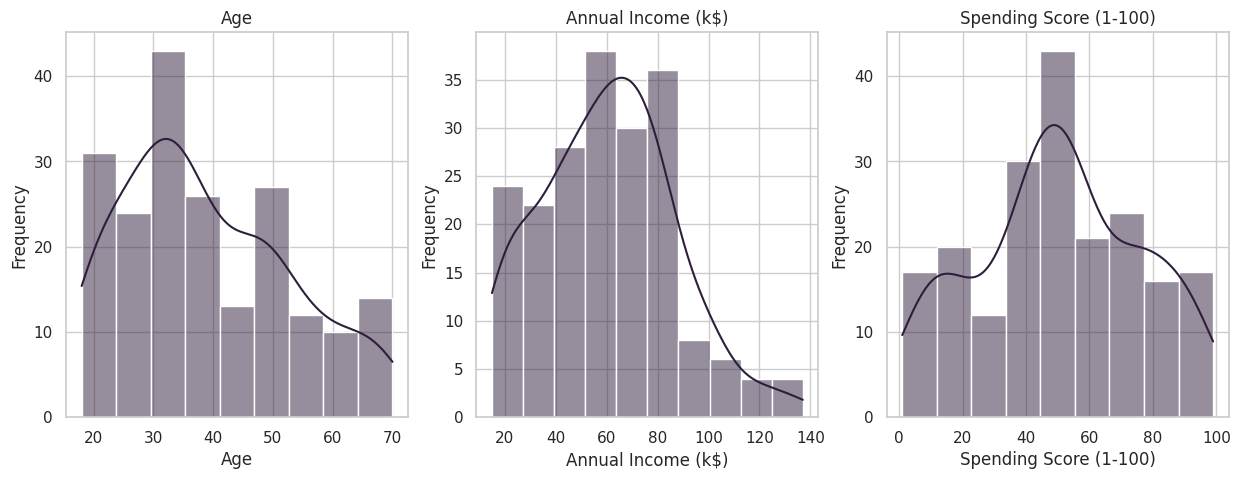

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


sns.set(style="whitegrid")
sns.set_palette("mako")


fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))


for i, column in enumerate(columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')


plt.show()

## **Pré Processamento**

In [11]:
padronizador = StandardScaler()

In [12]:
X = padronizador.fit_transform(df_final) ## Normalizando os dados

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

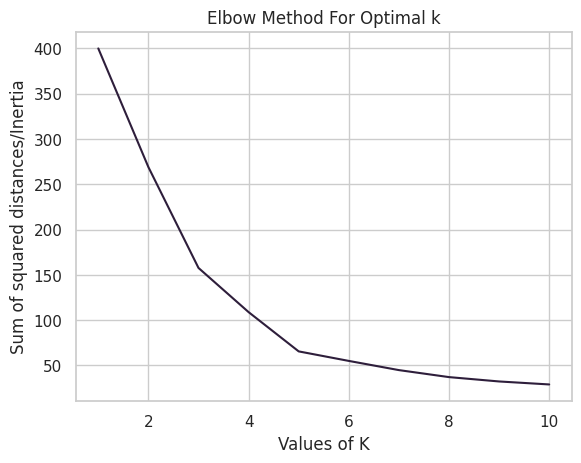

In [13]:
#Criação do modelo
# Para decidir o melhor número K para nosso modelo, vou utilizar o método Elbow.
sqd = []
K = range(1,11)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++',random_state=0)
 kmeans.fit(X)
 sqd.append(kmeans.inertia_)
plt.plot(K,sqd)
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
k = 5

In [15]:
kmeans = KMeans(n_clusters=k,init='k-means++',random_state=0) ## Criando o modelo

In [16]:
y_kmeans = kmeans.fit_predict(X) ## Aplicando o modelo em nossos dados.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
df['cluster'] = kmeans.labels_


In [18]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


### Visualização dos Clusters

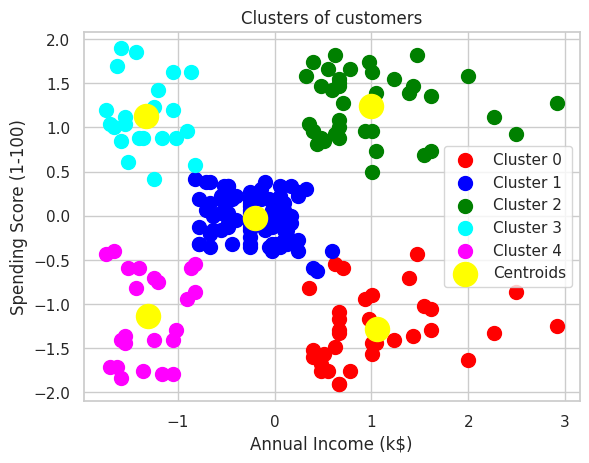

In [19]:
#Visualizing all the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Exportação do Arquivo

In [20]:
df.to_csv('/content/drive/My Drive/data.csv', index=True)